In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats


# Load the data
df = pd.read_csv("../data/weather/nyc_jan2020_mar2023.csv")

df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,new york city,2020-01-01T00:00:00,41.0,33.6,30.6,66.29,0.0,0,NaN,0.0,...,1004.3,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
1,new york city,2020-01-01T01:00:00,39.8,32.9,28.8,64.50,0.0,0,NaN,0.0,...,1004.3,33.6,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
2,new york city,2020-01-01T02:00:00,39.8,32.8,29.7,66.99,0.0,0,NaN,0.0,...,1004.7,87.9,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
3,new york city,2020-01-01T03:00:00,38.9,30.8,28.8,66.76,0.0,0,NaN,0.0,...,1005.1,29.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."
4,new york city,2020-01-01T04:00:00,38.9,33.7,26.8,61.35,0.0,0,NaN,0.0,...,1005.5,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              28463 non-null  object 
 1   datetime          28463 non-null  object 
 2   temp              28463 non-null  float64
 3   feelslike         28463 non-null  float64
 4   dew               28463 non-null  float64
 5   humidity          28463 non-null  float64
 6   precip            28463 non-null  float64
 7   precipprob        28463 non-null  int64  
 8   preciptype        3620 non-null   object 
 9   snow              28463 non-null  float64
 10  snowdepth         28463 non-null  float64
 11  windgust          15908 non-null  float64
 12  windspeed         28463 non-null  float64
 13  winddir           28463 non-null  float64
 14  sealevelpressure  28463 non-null  float64
 15  cloudcover        28463 non-null  float64
 16  visibility        28463 non-null  float6

In [3]:
import missingno as mno
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [4]:
df.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,15908.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,16271.000000,28463.000000,10696.000000
mean,56.436676,54.776492,42.806173,62.815728,0.002626,9.468433,0.001615,0.152732,18.592419,6.688944,195.600295,1017.117777,43.032962,9.407708,155.133977,0.977285,1.535327,11.112191
std,16.852903,19.585944,18.337319,18.539974,0.021788,29.278357,0.023528,1.133092,9.217588,4.095419,113.405070,7.694166,43.654967,1.599518,249.698495,1.003413,2.513419,7.061748
min,6.400000,-14.700000,-11.400000,10.380000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,976.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,43.000000,38.900000,28.000000,48.440000,0.000000,0.000000,0.000000,0.000000,11.400000,4.300000,61.000000,1012.200000,0.900000,9.900000,0.000000,0.100000,0.000000,10.000000
50%,55.400000,55.400000,43.000000,62.350000,0.000000,0.000000,0.000000,0.000000,18.300000,6.000000,240.000000,1016.800000,23.800000,9.900000,11.000000,0.600000,0.000000,10.000000
75%,71.000000,71.000000,58.900000,78.390000,0.000000,0.000000,0.000000,0.000000,23.700000,9.000000,279.000000,1022.300000,98.600000,9.900000,220.000000,1.600000,2.000000,10.000000
max,97.000000,106.100000,76.900000,99.720000,1.445000,100.000000,1.550000,37.280000,64.400000,31.300000,360.000000,1042.000000,100.000000,9.900000,1178.000000,4.200000,10.000000,100.000000


In [5]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
preciptype,24843,87.3
severerisk,17767,62.4
windgust,12555,44.1
solarenergy,12192,42.8


In [6]:
df.isna().sum()

name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
preciptype          24843
snow                    0
snowdepth               0
windgust            12555
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy         12192
uvindex                 0
severerisk          17767
conditions              0
icon                    0
stations                0
dtype: int64

In [7]:
df['datetime']= pd.to_datetime(df['datetime'])

In [8]:
import missingno as mno
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
preciptype,24843,87.3
severerisk,17767,62.4
windgust,12555,44.1
solarenergy,12192,42.8


In [10]:
df['stations'].value_counts()

72505394728,72055399999,KLGA,KJRB,F1417,KNYC,72503014732    11227
72505394728,72055399999,KLGA,KJRB,KNYC,72503014732           8979
72505394728,KLGA,KNYC,72503014732                            3493
72505394728,KLGA,F1417,KNYC,72503014732                      3115
72505394728,KLGA,F8726,KNYC,72503014732                       350
72505394728,72055399999,KLGA,KJRB,F8726,KNYC,72503014732      299
D9152,72505394728,KLGA,KNYC,72503014732                       118
72505394728,72055399999,KLGA,KJRB,F1417,KNYC                  118
72505394728,KLGA,KJRB,F1417,KNYC,72503014732                  115
72505394728,72055399999,KLGA,KJRB,KNYC                         88
72505394728,72055399999,KLGA,KJRB,F1417,72503014732            86
72505394728,KLGA,KJRB,KNYC,72503014732                         86
72505394728,72055399999,KLGA,KJRB,72503014732                  65
725,053,947,287,205,000,000,000,000,000,000                    41
KLGA,KJRB,F1417,KNYC                                           38
7250539472

In [11]:
df['datetime'].value_counts()

2022-11-06 01:00:00    2
2020-11-01 01:00:00    2
2021-11-07 01:00:00    2
2022-03-01 10:00:00    1
2022-03-01 21:00:00    1
                      ..
2021-01-30 05:00:00    1
2021-01-30 04:00:00    1
2021-01-30 03:00:00    1
2021-01-30 02:00:00    1
2023-03-31 23:00:00    1
Name: datetime, Length: 28460, dtype: int64

In [12]:
df['datetime']= pd.to_datetime(df['datetime'])
df['date']= df['datetime'].dt.date
df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
0,new york city,2020-01-01 00:00:00,41.0,33.6,30.6,66.29,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,new york city,2020-01-01 01:00:00,39.8,32.9,28.8,64.50,0.0,0,NaN,0.0,...,33.6,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,new york city,2020-01-01 02:00:00,39.8,32.8,29.7,66.99,0.0,0,NaN,0.0,...,87.9,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,new york city,2020-01-01 03:00:00,38.9,30.8,28.8,66.76,0.0,0,NaN,0.0,...,29.3,9.9,0.0,NaN,0,NaN,Partially cloudy,partly-cloudy-night,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,new york city,2020-01-01 04:00:00,38.9,33.7,26.8,61.35,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,NaN,Overcast,cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,new york city,2023-03-31 19:00:00,51.1,51.1,40.7,67.56,0.0,0,NaN,0.0,...,99.8,9.9,7.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,new york city,2023-03-31 20:00:00,48.9,46.7,40.8,73.40,0.0,0,NaN,0.0,...,100.0,9.9,2.0,0.0,0,10.0,Overcast,cloudy,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,new york city,2023-03-31 21:00:00,51.2,51.2,43.0,73.52,0.0,0,NaN,0.0,...,99.8,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31
28461,new york city,2023-03-31 22:00:00,53.9,53.9,45.0,71.67,0.0,0,NaN,0.0,...,100.0,9.9,0.0,NaN,0,10.0,Overcast,cloudy,"KLGA,KJRB,KNYC",2023-03-31


In [13]:
df['date'].value_counts()

2021-11-07    25
2022-11-06    25
2020-11-01    25
2022-02-25    24
2022-03-04    24
              ..
2021-01-26    24
2020-03-08    23
2022-03-13    23
2021-03-14    23
2023-03-12    23
Name: date, Length: 1186, dtype: int64

In [14]:
df[df['datetime']=='2022-11-06T01:00:00']

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,date
24960,new york city,2022-11-06 01:00:00,65.7,65.7,60.8,84.32,0.0,0,NaN,0.0,...,88.8,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06
24961,new york city,2022-11-06 01:00:00,66.0,66.0,61.0,83.91,0.0,0,NaN,0.0,...,60.4,9.9,0.0,NaN,0,10.0,Partially cloudy,partly-cloudy-night,"72505394728,KLGA,KNYC,72503014732",2022-11-06


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              28463 non-null  object        
 1   datetime          28463 non-null  datetime64[ns]
 2   temp              28463 non-null  float64       
 3   feelslike         28463 non-null  float64       
 4   dew               28463 non-null  float64       
 5   humidity          28463 non-null  float64       
 6   precip            28463 non-null  float64       
 7   precipprob        28463 non-null  int64         
 8   preciptype        3620 non-null   object        
 9   snow              28463 non-null  float64       
 10  snowdepth         28463 non-null  float64       
 11  windgust          15908 non-null  float64       
 12  windspeed         28463 non-null  float64       
 13  winddir           28463 non-null  float64       
 14  sealevelpressure  2846

In [16]:
df['name'].value_counts()

new york city    28463
Name: name, dtype: int64

In [17]:
df['stations'].value_counts()

72505394728,72055399999,KLGA,KJRB,F1417,KNYC,72503014732    11227
72505394728,72055399999,KLGA,KJRB,KNYC,72503014732           8979
72505394728,KLGA,KNYC,72503014732                            3493
72505394728,KLGA,F1417,KNYC,72503014732                      3115
72505394728,KLGA,F8726,KNYC,72503014732                       350
72505394728,72055399999,KLGA,KJRB,F8726,KNYC,72503014732      299
D9152,72505394728,KLGA,KNYC,72503014732                       118
72505394728,72055399999,KLGA,KJRB,F1417,KNYC                  118
72505394728,KLGA,KJRB,F1417,KNYC,72503014732                  115
72505394728,72055399999,KLGA,KJRB,KNYC                         88
72505394728,72055399999,KLGA,KJRB,F1417,72503014732            86
72505394728,KLGA,KJRB,KNYC,72503014732                         86
72505394728,72055399999,KLGA,KJRB,72503014732                  65
725,053,947,287,205,000,000,000,000,000,000                    41
KLGA,KJRB,F1417,KNYC                                           38
7250539472

In [18]:
df['icon'].value_counts()

clear-night            6864
clear-day              6256
cloudy                 6167
partly-cloudy-day      3532
partly-cloudy-night    2708
rain                   2482
snow                    411
fog                      43
Name: icon, dtype: int64

In [19]:
df['conditions'].value_counts()

Clear                                            13162
Overcast                                          6319
Partially cloudy                                  6287
Rain, Overcast                                    1854
Rain, Partially cloudy                             453
Rain                                               153
Snow, Rain, Overcast                               114
Snow, Overcast                                      77
Snow, Rain, Partially cloudy                        12
Freezing Drizzle/Freezing Rain, Overcast            11
Snow, Partially cloudy                               7
Snow, Rain                                           6
Ice, Overcast                                        5
Freezing Drizzle/Freezing Rain, Ice, Overcast        2
Rain, Ice, Overcast                                  1
Name: conditions, dtype: int64

In [20]:
df['preciptype'].value_counts()

rain                3221
snow                 229
rain,snow            138
freezingrain          19
ice                   10
freezingrain,ice       2
rain,ice               1
Name: preciptype, dtype: int64

In [21]:
df['precipprob'].describe()

count    28463.000000
mean         9.468433
std         29.278357
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        100.000000
Name: precipprob, dtype: float64

In [22]:
df['precip'].describe()

count    28463.000000
mean         0.002626
std          0.021788
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.445000
Name: precip, dtype: float64

In [23]:
df.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations', 'date'],
      dtype='object')

In [24]:
df.drop(columns=['name', 'datetime', 'dew', 'humidity','windgust',
       'windspeed', 'winddir', 'sealevelpressure','solarenergy','severerisk','icon', ], inplace=True)

In [25]:
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
preciptype,24843,87.3


In [26]:
df['preciptype'].value_counts()

rain                3221
snow                 229
rain,snow            138
freezingrain          19
ice                   10
freezingrain,ice       2
rain,ice               1
Name: preciptype, dtype: int64

In [27]:
df['preciptype'].fillna('no rain or snow', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            28463 non-null  float64
 1   feelslike       28463 non-null  float64
 2   precip          28463 non-null  float64
 3   precipprob      28463 non-null  int64  
 4   preciptype      28463 non-null  object 
 5   snow            28463 non-null  float64
 6   snowdepth       28463 non-null  float64
 7   cloudcover      28463 non-null  float64
 8   visibility      28463 non-null  float64
 9   solarradiation  28463 non-null  float64
 10  uvindex         28463 non-null  int64  
 11  conditions      28463 non-null  object 
 12  stations        28463 non-null  object 
 13  date            28463 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 3.0+ MB


In [29]:
df['preciptype']= df['preciptype'].astype('category')

In [30]:
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   temp            28463 non-null  float64       
 1   feelslike       28463 non-null  float64       
 2   precip          28463 non-null  float64       
 3   precipprob      28463 non-null  int64         
 4   preciptype      28463 non-null  category      
 5   snow            28463 non-null  float64       
 6   snowdepth       28463 non-null  float64       
 7   cloudcover      28463 non-null  float64       
 8   visibility      28463 non-null  float64       
 9   solarradiation  28463 non-null  float64       
 10  uvindex         28463 non-null  int64         
 11  conditions      28463 non-null  object        
 12  stations        28463 non-null  object        
 13  date            28463 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(8), int64(2

In [31]:
df

,temp,feelslike,precip,precipprob,preciptype,snow,snowdepth,cloudcover,visibility,solarradiation,uvindex,conditions,stations,date
0,41.0,33.6,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
1,39.8,32.9,0.0,0,no rain or snow,0.0,0.0,33.6,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
2,39.8,32.8,0.0,0,no rain or snow,0.0,0.0,87.9,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
3,38.9,30.8,0.0,0,no rain or snow,0.0,0.0,29.3,9.9,0.0,0,Partially cloudy,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
4,38.9,33.7,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,"72505394728,72055399999,KLGA,KJRB,KNYC,7250301...",2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,51.1,51.1,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,7.0,0,Overcast,"KLGA,KJRB,F1417,KNYC",2023-03-31
28459,48.9,46.7,0.0,0,no rain or snow,0.0,0.0,100.0,9.9,2.0,0,Overcast,"KLGA,KJRB,F8726,KNYC",2023-03-31
28460,51.2,51.2,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31
28461,53.9,53.9,0.0,0,no rain or snow,0.0,0.0,100.0,9.9,0.0,0,Overcast,"KLGA,KJRB,KNYC",2023-03-31


In [32]:
df.drop(columns=['stations'], inplace=True)
df

,temp,feelslike,precip,precipprob,preciptype,snow,snowdepth,cloudcover,visibility,solarradiation,uvindex,conditions,date
0,41.0,33.6,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,2020-01-01
1,39.8,32.9,0.0,0,no rain or snow,0.0,0.0,33.6,9.9,0.0,0,Partially cloudy,2020-01-01
2,39.8,32.8,0.0,0,no rain or snow,0.0,0.0,87.9,9.9,0.0,0,Partially cloudy,2020-01-01
3,38.9,30.8,0.0,0,no rain or snow,0.0,0.0,29.3,9.9,0.0,0,Partially cloudy,2020-01-01
4,38.9,33.7,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,51.1,51.1,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,7.0,0,Overcast,2023-03-31
28459,48.9,46.7,0.0,0,no rain or snow,0.0,0.0,100.0,9.9,2.0,0,Overcast,2023-03-31
28460,51.2,51.2,0.0,0,no rain or snow,0.0,0.0,99.8,9.9,0.0,0,Overcast,2023-03-31
28461,53.9,53.9,0.0,0,no rain or snow,0.0,0.0,100.0,9.9,0.0,0,Overcast,2023-03-31


In [33]:
df[['date', 'conditions']].value_counts().sort_index()

date        conditions      
2020-01-01  Clear                3
            Overcast            11
            Partially cloudy     9
            Rain, Overcast       1
2020-01-02  Clear               19
                                ..
2023-03-30  Partially cloudy     2
            Snow, Overcast       1
2023-03-31  Clear                8
            Overcast            13
            Partially cloudy     3
Length: 3731, dtype: int64

In [34]:
df['conditions'].value_counts()

Clear                                            13162
Overcast                                          6319
Partially cloudy                                  6287
Rain, Overcast                                    1854
Rain, Partially cloudy                             453
Rain                                               153
Snow, Rain, Overcast                               114
Snow, Overcast                                      77
Snow, Rain, Partially cloudy                        12
Freezing Drizzle/Freezing Rain, Overcast            11
Snow, Partially cloudy                               7
Snow, Rain                                           6
Ice, Overcast                                        5
Freezing Drizzle/Freezing Rain, Ice, Overcast        2
Rain, Ice, Overcast                                  1
Name: conditions, dtype: int64

In [35]:
most_common = df.groupby('date')['conditions'].apply(lambda x: x.value_counts().index[0]).to_dict()
df['day_condition'] = df['date'].map(most_common)
df['day_condition'].value_counts()

Clear                     15453
Overcast                   6889
Partially cloudy           4705
Rain, Overcast             1248
Snow, Rain, Overcast         96
Rain, Partially cloudy       48
Snow, Overcast               24
Name: day_condition, dtype: int64

In [36]:
df['precipprob'].apply(lambda x: x/100).value_counts()

0.0    25768
1.0     2695
Name: precipprob, dtype: int64

In [37]:
df['precipprob']= df['precipprob'].apply(lambda x: x/100)
df['precipprob'].value_counts()

0.0    25768
1.0     2695
Name: precipprob, dtype: int64

In [38]:
df['day_condition'].value_counts()

Clear                     15453
Overcast                   6889
Partially cloudy           4705
Rain, Overcast             1248
Snow, Rain, Overcast         96
Rain, Partially cloudy       48
Snow, Overcast               24
Name: day_condition, dtype: int64

In [39]:
df['day_condition']= df['day_condition'].apply(lambda x: x.split(',')[0])

In [40]:
df[['preciptype', 'day_condition']].value_counts()

preciptype        day_condition   
no rain or snow   Clear               14713
                  Overcast             5393
                  Partially cloudy     4184
rain              Overcast             1299
                  Rain                  771
                  Clear                 651
no rain or snow   Rain                  506
rain              Partially cloudy      499
snow              Overcast              120
                  Clear                  65
rain,snow         Overcast               59
                  Snow                   49
no rain or snow   Snow                   47
snow              Snow                   23
rain,snow         Clear                  20
snow              Partially cloudy       13
freezingrain      Overcast                9
rain,snow         Partially cloudy        9
snow              Rain                    8
ice               Overcast                6
freezingrain      Rain                    6
ice               Rain                   

In [41]:
df['day_condition'].value_counts()

Clear               15453
Overcast             6889
Partially cloudy     4705
Rain                 1296
Snow                  120
Name: day_condition, dtype: int64

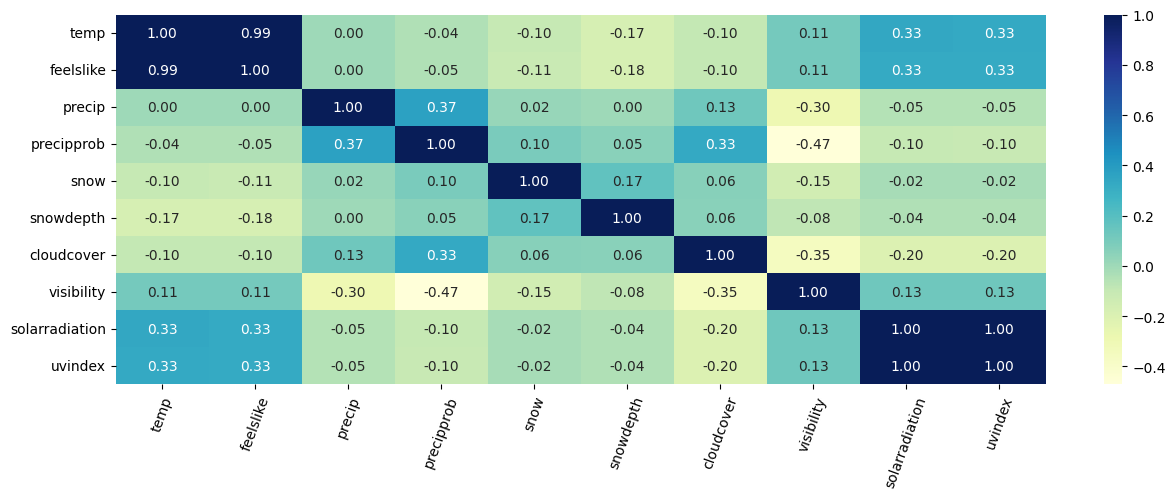

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [43]:
df.columns

Index(['temp', 'feelslike', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'cloudcover', 'visibility', 'solarradiation', 'uvindex',
       'conditions', 'date', 'day_condition'],
      dtype='object')

In [49]:
df= df[['temp','precipprob',  'visibility', 'date', 'uvindex', 'day_condition']]

df

,temp,precipprob,visibility,date,uvindex,day_condition
0,41.0,0.0,9.9,2020-01-01,0,Overcast
1,39.8,0.0,9.9,2020-01-01,0,Overcast
2,39.8,0.0,9.9,2020-01-01,0,Overcast
3,38.9,0.0,9.9,2020-01-01,0,Overcast
4,38.9,0.0,9.9,2020-01-01,0,Overcast
...,...,...,...,...,...,...
28458,51.1,0.0,9.9,2023-03-31,0,Overcast
28459,48.9,0.0,9.9,2023-03-31,0,Overcast
28460,51.2,0.0,9.9,2023-03-31,0,Overcast
28461,53.9,0.0,9.9,2023-03-31,0,Overcast


In [50]:
df= df[['date', 'temp',  'uvindex', 'precipprob',  'visibility', 'day_condition']]
df

,date,temp,uvindex,precipprob,visibility,day_condition
0,2020-01-01,41.0,0,0.0,9.9,Overcast
1,2020-01-01,39.8,0,0.0,9.9,Overcast
2,2020-01-01,39.8,0,0.0,9.9,Overcast
3,2020-01-01,38.9,0,0.0,9.9,Overcast
4,2020-01-01,38.9,0,0.0,9.9,Overcast
...,...,...,...,...,...,...
28458,2023-03-31,51.1,0,0.0,9.9,Overcast
28459,2023-03-31,48.9,0,0.0,9.9,Overcast
28460,2023-03-31,51.2,0,0.0,9.9,Overcast
28461,2023-03-31,53.9,0,0.0,9.9,Overcast


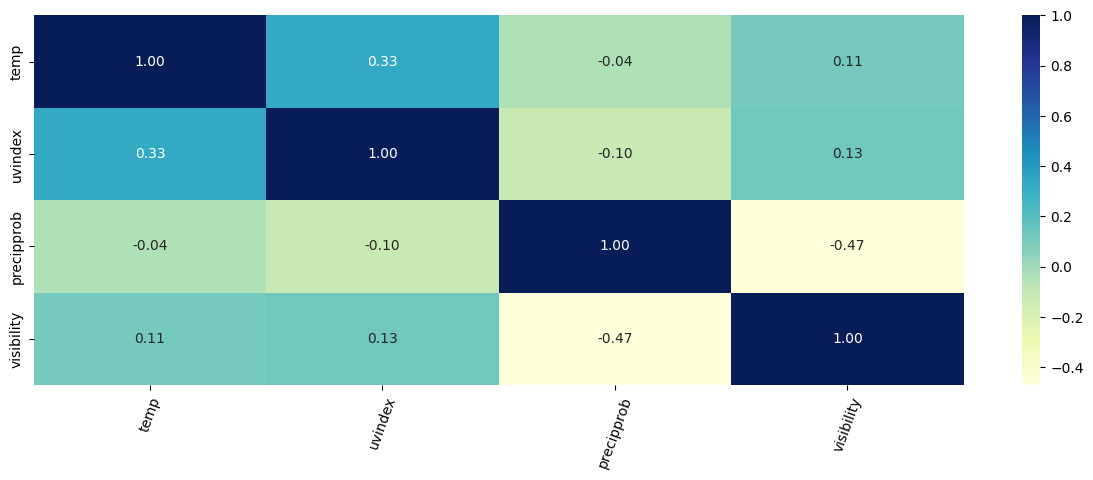

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [48]:
df.describe()

,temp,feelslike,precip,precipprob,snow,snowdepth,cloudcover,visibility,solarradiation,uvindex
count,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000,28463.000000
mean,56.436676,54.776492,0.002626,0.094684,0.001615,0.152732,43.032962,9.407708,155.133977,1.535327
std,16.852903,19.585944,0.021788,0.292784,0.023528,1.133092,43.654967,1.599518,249.698495,2.513419
min,6.400000,-14.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,38.900000,0.000000,0.000000,0.000000,0.000000,0.900000,9.900000,0.000000,0.000000
50%,55.400000,55.400000,0.000000,0.000000,0.000000,0.000000,23.800000,9.900000,11.000000,0.000000
75%,71.000000,71.000000,0.000000,0.000000,0.000000,0.000000,98.600000,9.900000,220.000000,2.000000
max,97.000000,106.100000,1.445000,1.000000,1.550000,37.280000,100.000000,9.900000,1178.000000,10.000000


In [47]:
df.shape

(28463, 14)

In [52]:
df['date'] = pd.to_datetime(df['date'])

# group by date and calculate min, max, and mean temperature for each group
temp_summary = df.groupby('date')['temp'].agg(['min', 'max', 'mean']).reset_index()
temp_summary.columns=['date','temp_min', 'temp_max', 'temp_mean']

precipprob_summary = df.groupby('date')['precipprob'].agg(['max']).reset_index()
precipprob_summary.columns=['date','precipprob_max']

visibility_summary = df.groupby('date')['visibility'].agg(['min', 'max', 'mean']).reset_index()
visibility_summary.columns=['date','visibility_min', 'visibility_max', 'visibility_mean']

uvindex_summary = df.groupby('date')['uvindex'].agg(['min', 'max', 'mean']).reset_index()
uvindex_summary.columns=['date','uvindex_min', 'uvindex_max', 'uvindex_mean']

temp_summary

,date,temp_min,temp_max,temp_mean
0,2020-01-01,35.1,41.0,38.462500
1,2020-01-02,33.2,48.0,40.587500
2,2020-01-03,44.1,47.1,45.737500
3,2020-01-04,44.0,48.9,46.850000
4,2020-01-05,37.1,44.7,40.245833
...,...,...,...,...
1181,2023-03-27,44.9,57.8,50.579167
1182,2023-03-28,43.9,51.9,47.175000
1183,2023-03-29,42.0,55.1,46.695833
1184,2023-03-30,33.0,48.6,41.091667


In [53]:
df

,date,temp,uvindex,precipprob,visibility,day_condition
0,2020-01-01,41.0,0,0.0,9.9,Overcast
1,2020-01-01,39.8,0,0.0,9.9,Overcast
2,2020-01-01,39.8,0,0.0,9.9,Overcast
3,2020-01-01,38.9,0,0.0,9.9,Overcast
4,2020-01-01,38.9,0,0.0,9.9,Overcast
...,...,...,...,...,...,...
28458,2023-03-31,51.1,0,0.0,9.9,Overcast
28459,2023-03-31,48.9,0,0.0,9.9,Overcast
28460,2023-03-31,51.2,0,0.0,9.9,Overcast
28461,2023-03-31,53.9,0,0.0,9.9,Overcast


In [55]:
import os
os.chdir(r"D:\OneDrive - Indian School of Business\Desktop\data270_spring23_group2\data\final")

In [57]:
df.to_csv('cleaned_weather.csv', index=False)

In [58]:
# merge the temperature summary back to the original DataFrame
df = pd.merge(df, temp_summary, on='date')
df = pd.merge(df, precipprob_summary, on='date')
df = pd.merge(df, visibility_summary, on='date')
df = pd.merge(df, uvindex_summary, on='date')
df

,date,temp,uvindex,precipprob,visibility,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,41.0,0,0.0,9.9,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-01,39.8,0,0.0,9.9,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
2,2020-01-01,39.8,0,0.0,9.9,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
3,2020-01-01,38.9,0,0.0,9.9,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
4,2020-01-01,38.9,0,0.0,9.9,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28458,2023-03-31,51.1,0,0.0,9.9,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28459,2023-03-31,48.9,0,0.0,9.9,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28460,2023-03-31,51.2,0,0.0,9.9,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28461,2023-03-31,53.9,0,0.0,9.9,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28463 entries, 0 to 28462
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             28463 non-null  datetime64[ns]
 1   temp             28463 non-null  float64       
 2   uvindex          28463 non-null  int64         
 3   precipprob       28463 non-null  float64       
 4   visibility       28463 non-null  float64       
 5   day_condition    28463 non-null  object        
 6   temp_min         28463 non-null  float64       
 7   temp_max         28463 non-null  float64       
 8   temp_mean        28463 non-null  float64       
 9   precipprob_max   28463 non-null  float64       
 10  visibility_min   28463 non-null  float64       
 11  visibility_max   28463 non-null  float64       
 12  visibility_mean  28463 non-null  float64       
 13  uvindex_min      28463 non-null  int64         
 14  uvindex_max      28463 non-null  int64

In [60]:
df.isna().sum()

date               0
temp               0
uvindex            0
precipprob         0
visibility         0
day_condition      0
temp_min           0
temp_max           0
temp_mean          0
precipprob_max     0
visibility_min     0
visibility_max     0
visibility_mean    0
uvindex_min        0
uvindex_max        0
uvindex_mean       0
dtype: int64

In [61]:
df.columns

Index(['date', 'temp', 'uvindex', 'precipprob', 'visibility', 'day_condition',
       'temp_min', 'temp_max', 'temp_mean', 'precipprob_max', 'visibility_min',
       'visibility_max', 'visibility_mean', 'uvindex_min', 'uvindex_max',
       'uvindex_mean'],
      dtype='object')

In [62]:
df.drop(columns=['temp', 'precipprob', 'visibility', 'uvindex'], inplace=True)

df

,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
2,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
3,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
4,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
...,...,...,...,...,...,...,...,...,...,...,...,...
28458,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28459,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28460,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000
28461,2023-03-31,Overcast,38.9,54.9,45.908333,0.0,8.8,9.9,9.854167,0,6,1.375000


In [63]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-02,Clear,33.2,48.0,40.587500,1.0,9.9,9.9,9.900000,0,4,0.833333
2,2020-01-03,Overcast,44.1,47.1,45.737500,1.0,1.7,9.9,7.733333,0,1,0.166667
3,2020-01-04,Overcast,44.0,48.9,46.850000,1.0,0.8,9.9,5.279167,0,1,0.125000
4,2020-01-05,Partially cloudy,37.1,44.7,40.245833,0.0,9.9,9.9,9.900000,0,5,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2023-03-27,Clear,44.9,57.8,50.579167,1.0,9.5,9.9,9.879167,0,8,1.500000
1182,2023-03-28,Overcast,43.9,51.9,47.175000,0.0,9.9,9.9,9.900000,0,10,1.375000
1183,2023-03-29,Clear,42.0,55.1,46.695833,0.0,9.9,9.9,9.900000,0,9,2.541667
1184,2023-03-30,Clear,33.0,48.6,41.091667,1.0,9.9,9.9,9.900000,0,9,2.666667


In [64]:
df.date.max()- df.date.min()

Timedelta('1185 days 00:00:00')

In [65]:
df.to_csv('cleaned_aggregated_weather.csv', index=False)

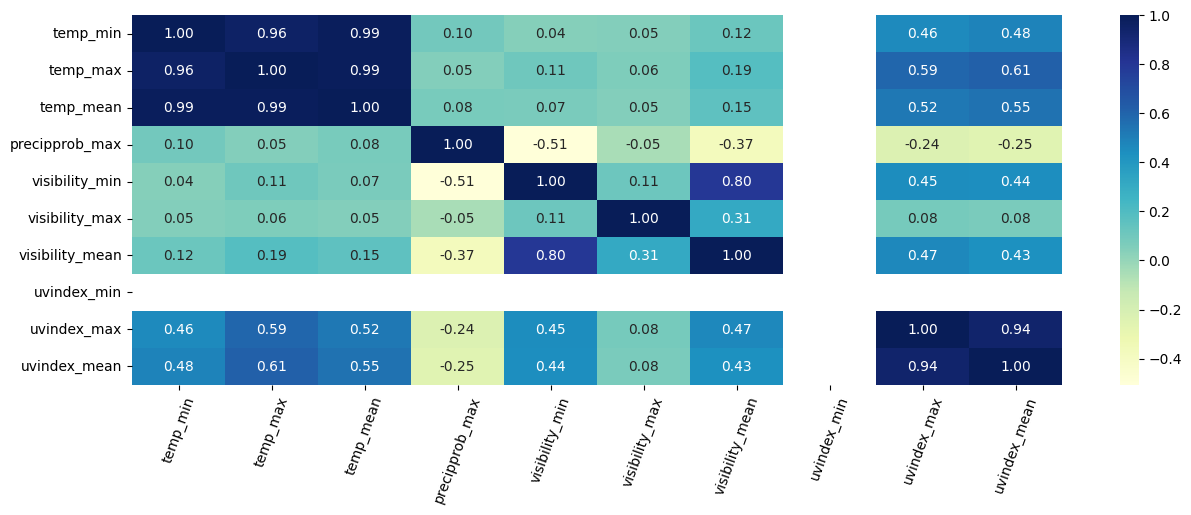

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)

hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

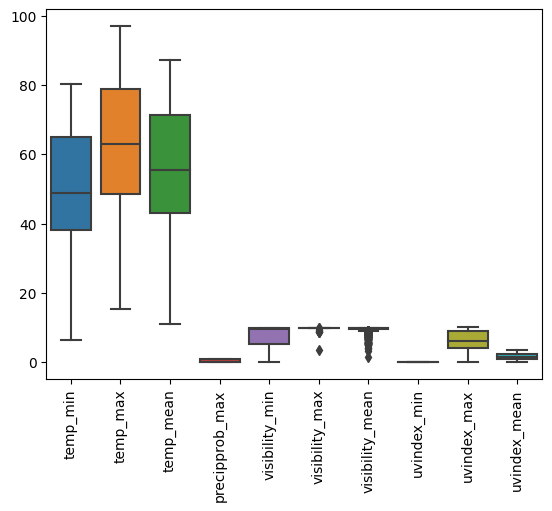

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

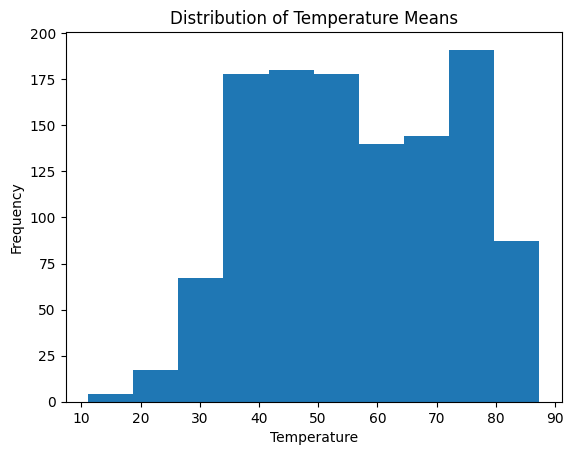

In [70]:
plt.hist(df['temp_mean'])

# add labels and a title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Means')

# display the plot
plt.show()

In [71]:
df

,date,day_condition,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
0,2020-01-01,Overcast,35.1,41.0,38.462500,1.0,9.9,9.9,9.900000,0,2,0.416667
1,2020-01-02,Clear,33.2,48.0,40.587500,1.0,9.9,9.9,9.900000,0,4,0.833333
2,2020-01-03,Overcast,44.1,47.1,45.737500,1.0,1.7,9.9,7.733333,0,1,0.166667
3,2020-01-04,Overcast,44.0,48.9,46.850000,1.0,0.8,9.9,5.279167,0,1,0.125000
4,2020-01-05,Partially cloudy,37.1,44.7,40.245833,0.0,9.9,9.9,9.900000,0,5,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2023-03-27,Clear,44.9,57.8,50.579167,1.0,9.5,9.9,9.879167,0,8,1.500000
1182,2023-03-28,Overcast,43.9,51.9,47.175000,0.0,9.9,9.9,9.900000,0,10,1.375000
1183,2023-03-29,Clear,42.0,55.1,46.695833,0.0,9.9,9.9,9.900000,0,9,2.541667
1184,2023-03-30,Clear,33.0,48.6,41.091667,1.0,9.9,9.9,9.900000,0,9,2.666667
